In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# UPLOAD CUSTOM MODULE & DATASETS
from google.colab import files
uploaded = files.upload()
!ls

drive  __pycache__  QLAgentEnvironment.py  QLAgentModule.py  sample_data


In [11]:
# IMPORT MODULE/S:

import QLAgentModule
from QLAgentModule import MODEL_SELECTOR, MODEL_BUILDER, METHODS_REQUIRE_LABELS, ALGORITHM_METHODS, COMBO_GENERATOR, DATA_ENGINEERING
#METHODS_REQUIRE_LABELS = QLAgentModule.METHODS_REQUIRE_LABELS

import QLAgentEnvironment
from QLAgentEnvironment import FeatureEngineeringEnvironment, QLearningAgent, train_evaluate_agent, visualize_results

#**IRIS DATASET**


*   **Problem Type:** Multi-class Classification
*   **Model used:** Decision Tree Classifier



In [12]:
# __________Iris Dataset______________
from sklearn.datasets import load_iris
DATA, LABELS = load_iris(return_X_y=True)

print(f"Iris Dataset:\n")
print(f"Data Shape: {DATA.shape}")
print(f"Labels Shape: {LABELS.shape}")
print(f"Data Shape: {DATA.dtype}")
print(f"Labels Shape: {LABELS.dtype}")
print("-"*50)

# __________MODULE CONNECTION_________
selector = MODEL_SELECTOR()
# Select the problem type
problem_type = selector.select_problem_type()
model_options = selector.select_model(problem_type)
print(f"Select a suitable model for {problem_type}: {model_options}")
# User inputs the selected model
SELECTED_MODEL = input("Enter your selected model from the list above: ")


Iris Dataset:

Data Shape: (150, 4)
Labels Shape: (150,)
Data Shape: float64
Labels Shape: int64
--------------------------------------------------
Select a problem type from the following options:
1. Regression
2. Binary_Classification
3. Multiclass_Classification
4. Clustering
5. Recommendation_System
6. Topic_Modeling
7. Image_Classification
8. Text_Classification
Enter your choice (type the name of the problem): Multiclass_Classification
Select a suitable model for Multiclass_Classification: ['random_forest_classifier', 'SVM', 'decision_tree_classifier', 'SVM', 'Hist_Gradient_Boosting', 'knn_classifier', 'basic_CNN', 'advanced_CNN', 'LDA']
Enter your selected model from the list above: decision_tree_classifier


In [13]:
GET_MODEL = MODEL_BUILDER(SELECTED_MODEL)
MODEL = GET_MODEL.build_model()
FEATURE_METHODS_DIC = ALGORITHM_METHODS[SELECTED_MODEL]
FEATURE_METHODS = list(FEATURE_METHODS_DIC.keys())
ALL_METHODS_COMBINATIONS = COMBO_GENERATOR(FEATURE_METHODS).generate_combos()
if not ALL_METHODS_COMBINATIONS:
    raise ValueError("No feature method combinations were generated.")

print(f"========================== MODEL & FIEATURES SUMMARY ==========================")
print(f"\nSELECTED MODEL:")
print(f"{MODEL}\n")
print("FEATURE_METHODS:")
for idx, method in enumerate(FEATURE_METHODS, start=1):
    print(f"{idx}. {method}")
print("\nFEATURE_METHODS COMBINATIONS:")
for idx, combo in enumerate(ALL_METHODS_COMBINATIONS, start=1):
    print(f"    {idx}. {combo}")

print("-"*50)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


pca, variance_threshold, kernel_pca
kernel_pca, nmf, svd
standard_scaler, nmf
variance_threshold, kernel_pca, svd
standard_scaler, svd, agglomeration
standard_scaler, variance_threshold
standard_scaler, kernel_pca, nmf
standard_scaler, kernel_pca, k_binning
variance_threshold, kernel_pca, nmf
pca, log_transform, k_binning
========================== MODEL & FIEATURES SUMMARY ==========================

SELECTED MODEL:
DecisionTreeClassifier()

FEATURE_METHODS:
1. standard_scaler
2. pca
3. log_transform
4. variance_threshold
5. kernel_pca
6. ica
7. nmf
8. svd
9. agglomeration
10. k_binning

FEATURE_METHODS COMBINATIONS:
    1. ('pca', 'variance_threshold', 'kernel_pca')
    2. ('kernel_pca', 'nmf', 'svd')
    3. ('standard_scaler', 'nmf')
    4. ('variance_threshold', 'kernel_pca', 'svd')
    5. ('standard_scaler', 'svd', 'agglomeration')
    6. ('standard_scaler', 'variance_threshold')
    7. ('standard_scaler', 'kernel_pca', 'nmf')
    8. ('standard_scaler', 'kernel_pca', 'k_binning')


ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Initial accuracy (cross-validation mean): 0.9533
Initial Accuracy: 0.9533333333333334
--------------------------------------------------
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Tr

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


(150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
========================== Random combination 9:('variance_threshold', 'kernel_pca', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engi

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


(150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
====================

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (1

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nm

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (1

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nm

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nm

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
========================== Random combination 9:('variance_threshold', 'kernel_pca', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engi

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (1

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
Data processed after applying combination number 1, shape is (150, 1)
Data processed after applying combination number 2, shape is (150, 1)
Data processed after applying combination number 3, shape is (150, 1)
Data processed after applying combination number 4, shape is (150, 1)
Data processed after applying combination number 5, shape is (150, 1)
Data processed after applying combin

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: svd
Shape of the

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


 (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the da

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (1

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nm

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.



Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (1

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


 (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca


ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.



Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineerin

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (1

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: svd
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (150, 1)
========================== Random combination 6:('st

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 1)
========================== Random combination 6:('standard_scaler', 'variance_threshold') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
========================== Random combination 7:('standard_scaler', 'kernel_pca', 'nmf') ==========================
Shape after feature engineer

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.



Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
Data processed after applying combination number 1, shape is (150, 1)
Data processed after applying combination number 2, shape is (150, 1)
Data processed after applying combination number 3, shape is (150, 1)
Data processed after applying combination number 4, shape is (150, 1)
Data processed after applying combination number 5, shape is (150, 1)
Data processed after applying combination number 6, shape is (150, 4)
Data processed after applying combination number 7, shape is (150, 1)
Data processed after applying combination number 8, shape is (150, 1)
Data processed after applying combination number 9, shape is (150, 1)
Data processed after applying co

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (1

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (1

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (1

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
Data processed after applying combination number 1, shape is (150, 1)
Data processed after applying combination number 2, shape is (150, 1)
Data processed after applying combination number 3, shape is (150, 1)
Data processed after applying combination number 4, shape is (150, 1)
Data processed after applying combination number 5, shape is (150, 1)
Data processed after applying combination number 6, shape is (150, 4)
Data processed after applying combination number 7, shape is (150, 1)
Data processed after applying combina

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
Data processed after applying combination number 1, shape is (150, 1)
Data processed after applying combination number 2, shape is (150, 1)
Data processed after applying combination number 3, shape is (150, 1)
Data processed after applying combination number 4, shape is (150, 1)
Data processed after applying combination number 5, shape is (150, 1)
Data processed after applying combin

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: svd
Shape of the

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


 (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


 (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
Data processed after applying combination number 1, shape is (150, 1)
Data processed after applying combination number 2, shape is (150, 1)
Data processed after applying combination number 3, shape is (150, 1)
Data processed after applying combination number 4, shape is (150, 1)
Data processed after applying combination number 5, shape is (150, 1)
Data processed after applying combination number 6, shape is (150, 4)
Data processed after applying combination 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape aft

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (1

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


(150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
========================== Random combination 9:('variance_threshold', 'kernel_pca', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shap

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.



========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nm

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: svd
Shape of the

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


(150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature en

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 8:('standard_scaler', 'kernel_pca', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineerin

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Data processed after applying combination number 1, shape is (150, 1)
Data processed after applying combination number 2, shape is (150, 1)
Data processed after applying combination number 3, shape is (150, 1)
Data processed after applying combination number 4, shape is (150, 1)
Data processed after applying combination number 5, shape is (150, 1)
Data processed after applying combination number 6, shape is (150, 4)
Data processed after applying combination number 7, shape is (150, 1)
Data processed after applying combination number 8, shape is (150, 1)
Data processed after applying combination number 9, shape is (150, 1)
Data processed after applying combination number 10, shape is (150, 1)
future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kern

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: svd
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (150, 1)
========================== Random combination 6:('st

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.



========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 8:('standard_scaler', 'kernel_pca', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineerin

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
========================== Random combination 9:('variance_threshold', 'kernel_pca', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engi

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: svd
Shape of the

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (1

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


 (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature eng

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape after feature engineering - Train: (150, 1)
========================== Random combination 6:('standard_scaler', 'variance_threshold') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
========================== Random combination 7:('standard_scaler', 'kernel_pca', 'nmf') ==========================
Shape after feature engineer

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


 (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (1

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: svd
Shape of the

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


(150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature en

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.



Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying featu

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nm

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
Data processed after applying combination number 1, shape is (150, 1)
Data processed after applying combination number 2, shape is (150, 1)
Data processed after applying combination number 3, shape is (150, 1)
Data processed after applying combination number 4, shape is (150, 1)
Data processed after applying combination number 5, shape is (150, 1)
Data processed after applying combination number 6, shape is (150, 4)
Data processed after applying combination number 7, shape is (150, 1)
Data processed after applying combina

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


(150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combinati

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.



Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 

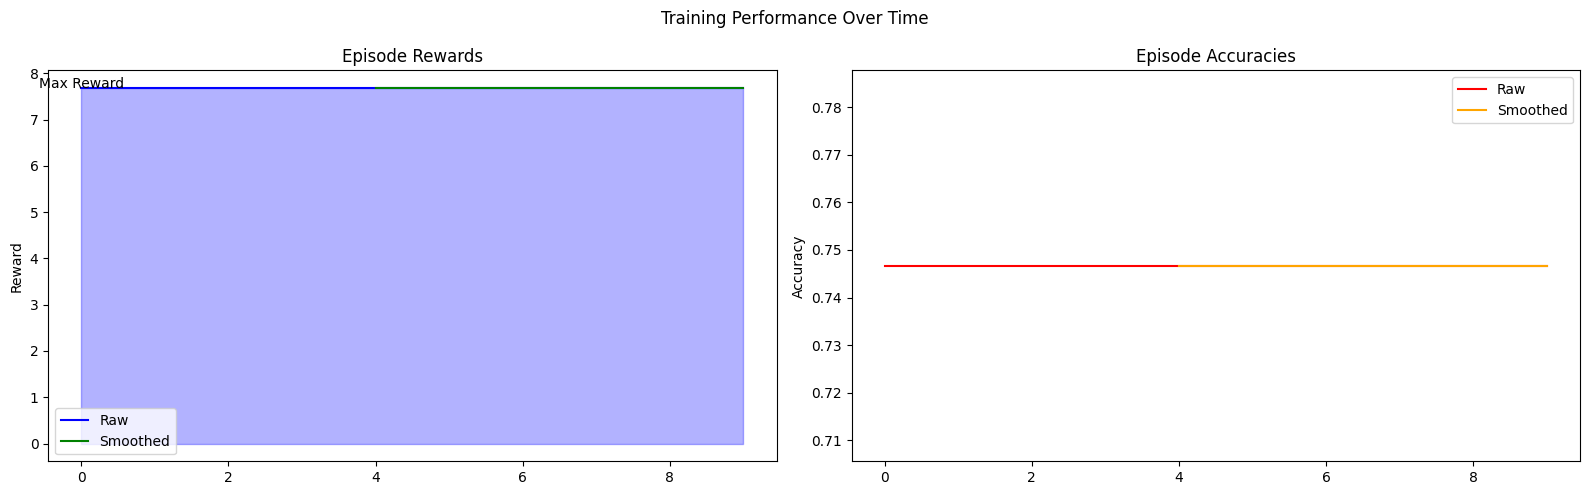

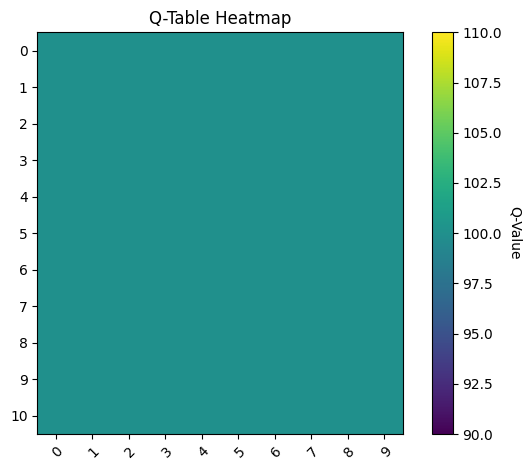

In [15]:
# __________REQUIRED PARAMETERS________
NUM_ACTIONS = len(ALL_METHODS_COMBINATIONS)
NUM_STATES = NUM_ACTIONS + 1
MAX_EPISODES = 10

# __________ENVIRONMENT INITIALIZATION________
ENV = FeatureEngineeringEnvironment(DATA, LABELS, MODEL, FEATURE_METHODS,
                                    ALL_METHODS_COMBINATIONS)

# __________QL-AGENT INITIALIZATION___________
AGENT = QLearningAgent(num_states=NUM_STATES, num_actions=NUM_ACTIONS,
                        lr_min=0.001, lr_max=0.1, df=0.999, eps=1.0, eps_min=0.1,
                        eps_decay=0.001, decay=0.05, window_size=50,
                        total_episodes=MAX_EPISODES)

# __________GET INIIAL MODEL ACCURACY____________
# To set the initial accuracy.
ENV.get_initial_accuracy(DATA, LABELS, MODEL, num_folds=5)
print(f"Initial Accuracy: {ENV.initial_accuracy}")
print("-"*50)

#___________OUTPUTS & VISUALIZATIONS____________________

# Get outputs
OUTPUTS = train_evaluate_agent(ENV, AGENT, ALL_METHODS_COMBINATIONS,
                                MAX_EPISODES)
# Unpack outputs
episode_rewards, episode_accuracies, top_combinations, q_table = OUTPUTS

# Visualize the results of the Q-Learning agent.
VISUALIZE_OUTPUTS = visualize_results(episode_rewards, episode_accuracies,
                                      q_table, NUM_ACTIONS, top_combinations)

#**BREAST CANCER DATASET**

*   **Problem Type:** Multi-class Classification
*   **Model used:** Decision Tree Classifier

In [ ]:

# __________Breast Cancer Dataset______________
from sklearn.datasets import load_breast_cancer
DATA, LABELS = load_breast_cancer(return_X_y=True)

print(f"Breast Cancer Dataset:\n")
print(f"Data Shape: {DATA.shape}")
print(f"Labels Shape: {LABELS.shape}")
print(f"Data Shape: {DATA.dtype}")
print(f"Labels Shape: {LABELS.dtype}")
print("-"*50)

# __________MODULE CONNECTION_________
selector = MODEL_SELECTOR()
# Select the problem type
problem_type = selector.select_problem_type()
model_options = selector.select_model(problem_type)
print(f"Select a suitable model for {problem_type}: {model_options}")
# User inputs the selected model
SELECTED_MODEL = input("Enter your selected model from the list above: ")

Breast Cancer Dataset:

Data Shape: (569, 30)
Labels Shape: (569,)
Data Shape: float64
Labels Shape: int64
--------------------------------------------------
Select a problem type from the following options:
1. Regression
2. Binary_Classification
3. Multiclass_Classification
4. Clustering
5. Recommendation_System
6. Topic_Modeling
7. Image_Classification
8. Text_Classification
Enter your choice (type the name of the problem): Multiclass_Classification
Select a suitable model for Multiclass_Classification: ['random_forest_classifier', 'SVM', 'decision_tree_classifier', 'SVM', 'Hist_Gradient_Boosting', 'knn_classifier', 'basic_CNN', 'advanced_CNN', 'LDA']
Enter your selected model from the list above: Hist_Gradient_Boosting


In [ ]:
GET_MODEL = MODEL_BUILDER(SELECTED_MODEL)
MODEL = GET_MODEL.build_model()
FEATURE_METHODS_DIC = ALGORITHM_METHODS[SELECTED_MODEL]
FEATURE_METHODS = list(FEATURE_METHODS_DIC.keys())
ALL_METHODS_COMBINATIONS = COMBO_GENERATOR(FEATURE_METHODS).generate_combos()
if not ALL_METHODS_COMBINATIONS:
    raise ValueError("No feature method combinations were generated.")

print(f"========================== MODEL & FIEATURES SUMMARY ==========================")
print(f"\nSELECTED MODEL:")
print(f"{MODEL}\n")
print("FEATURE_METHODS:")
for idx, method in enumerate(FEATURE_METHODS, start=1):
    print(f"{idx}. {method}")
print("\nFEATURE_METHODS COMBINATIONS:")
for idx, combo in enumerate(ALL_METHODS_COMBINATIONS, start=1):
    print(f"    {idx}. {combo}")

print("-"*50)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


pca, kernel_pca, agglomeration
variance_threshold, svd, agglomeration
log_transform, kernel_pca, agglomeration
pca, svd, agglomeration
standard_scaler, variance_threshold
pca, nmf
log_transform, kernel_pca, k_binning
kernel_pca, k_binning
standard_scaler, kernel_pca, ica
standard_scaler, pca, agglomeration
========================== MODEL & FIEATURES SUMMARY ==========================

SELECTED MODEL:
HistGradientBoostingClassifier()

FEATURE_METHODS:
1. standard_scaler
2. pca
3. log_transform
4. variance_threshold
5. kernel_pca
6. ica
7. nmf
8. svd
9. agglomeration
10. k_binning

FEATURE_METHODS COMBINATIONS:
    1. ('pca', 'kernel_pca', 'agglomeration')
    2. ('variance_threshold', 'svd', 'agglomeration')
    3. ('log_transform', 'kernel_pca', 'agglomeration')
    4. ('pca', 'svd', 'agglomeration')
    5. ('standard_scaler', 'variance_threshold')
    6. ('pca', 'nmf')
    7. ('log_transform', 'kernel_pca', 'k_binning')
    8. ('kernel_pca', 'k_binning')
    9. ('standard_scaler', 'k

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Initial accuracy (cross-validation mean): 0.9667
Initial Accuracy: 0.9666666666666668
--------------------------------------------------
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Tr

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
Data processed after applying combination number 1, shape is (150, 1)
Data processed after applying combination number 2, shape is (150, 1)
Data processed after applying combination number 3, shape is (150, 1)
Data processed after applying combination number 4, shape is (150, 1)
Data processed after applying combination number 5, shape is (150, 1)
Data processed after applying combin

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


 (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.



Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
Data processed after applying combination number 1, shape is (150, 1)
Data processed after applying combination number 2, shape is (150, 1)
Data processed after applying combination number 3, shape is (150, 1)
Data processed after applying combination number 4, shape is (150, 1)
Data processed after applying combination number 5, shape is (150, 1)
Data processed after applying combination number 6, shape is (150, 4)
Data processed after applying combination number 7, shape is (150, 1)
Data processed after applying combination number 8, shape is (150, 1)
Data processed after applying combination number 9, shape is (150, 1)
Data processed after applying combination number 10, shape is (150, 1)
future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('st

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


(150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150,

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
Data processed after applying combination number 1, shape is (150, 1)
Data processed after applying combination number 2, shape is (150, 1)
Data processed after applying combination number 3, shape is (150, 1)
Data processed after applying combination number 4, shape is (150, 1)
Data processed after applying combination number 5, shape is (150, 1)
Data processed after applying combin

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: svd
Shape of the

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.



Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
Data processed after applying combination number 1, shape is (150, 1)
Data processed after applying combination number 2, shape is (150, 1)
Data processed after applying combination number 3, shape is (150, 1)
Data processed after applying combination number 4, shape is (150, 1)
Data processed after applying combination number 5, shape is (150, 1)
Data processed after applying combination number 6, shape is (150, 4)
Data processed after applying combination number 7, shape is (150, 1)
Data processed after applying combination number 8, shape is (150, 1)
Data processed after applying combination number 9, shape is (150, 1)
Data processed after applying combination number 10, shape is (150, 1)
future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random c

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 8:('standard_scaler', 'kernel_pca', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineerin

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.



Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape af

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 8:('standard_scaler', 'kernel_pca', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineerin

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: svd
Shape of the

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
Data processed after applying combination number 1, shape is (150, 1)
Data processed after applying combination number 2, shape is (150, 1)
Data processed after applying combination number 3, shape is (150, 1)
Data processed after applying combination number 4, shape is (150, 1)
Data processed after applying combination number 5, shape is (150, 1)
Data processed after applying combin

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 8:('standard_scaler', 'kernel_pca', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying fe

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 8:('standard_scaler', 'kernel_pca', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying fe

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (1

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


 (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature e

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
========================== Random combination 9:('variance_threshold', 'kernel_pca', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engi

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


 (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 8:('standard_scaler', 'kernel_pca', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


 (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (1

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


 (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
Data processed after applying combination number 1, shape is (150, 1)
Data processed after applying combination number 2, shape is (150, 1)
Data processed after applying combination number 3, shape is (150, 1)
Data processed after applying combination number 4, shape is (150, 1)
Data processed after applying combination number 5, shape is (150, 1)
Data processed after applying combination number 6, shape is (150, 4)
Data processed after applying combination number 7, shape is (150, 1)
Data processed after applying combination number 8, shape is (150, 1)
Data processed after applying combination number 9, shape is (150, 1)
Data processed after applying combination number 10, shape is (150, 1)
future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_th

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


 (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: varian

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 8:('standard_scaler', 'kernel_pca', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineerin

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 1)
========================== Random combination 6:('standard_scaler', 'variance_threshold') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
========================== Random combination 7:('standard_scaler', 'kernel_pca', 'nmf') ==========================
Shape after feature engineer

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 8:('standard_scaler', 'kernel_pca', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying fe

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape aft

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (1

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 8:('standard_scaler', 'kernel_pca', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineerin

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: svd
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (150, 1)
========================== Random combination 6:('st

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nm

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 1)
========================== Random combination 6:('standard_scaler', 'variance_threshold') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
========================== Random combination 7:('standard_scaler', 'kernel_pca', 'nmf') ==========================
Shape after feature engineer

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
Data processed after applying combination number 1, shape is (150, 1)
Data processed after applying combination number 2, shape is (150, 1)
Data processed after applying combination number 3, shape is (150, 1)
Data processed after applying combination number 4, shape is (150, 1)
Data processed after applying combination number 5, shape is (150, 1)
Data processed after applying combination number 6, shape is (150, 4)
Data processed after applying combination number 7, shape is (150, 1)
Data processed after applying combina

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


(150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: k_binning
Shape of the data now is:  (150, 1)
Data processed after applying combination number 1, shape is (150, 1)
Data processed after applying combination number 2, shape is (150, 1)
Data processed after applying combination number 3, shape is (150, 1)
Data processed after applying combination number 4, shape is (150, 1)
Data processed after applying combination number 5, shape is (150, 1)
Data processed after applying combination number 6, shape is (1

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: svd
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (150, 1)
========================== Random combination 6:('st

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (1

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Data processed after applying combination number 1, shape is (150, 1)
Data processed after applying combination number 2, shape is (150, 1)
Data processed after applying combination number 3, shape is (150, 1)
Data processed after applying combination number 4, shape is (150, 1)
Data processed after applying combination number 5, shape is (150, 1)
Data processed after applying combination number 6, shape is (150, 4)
Data processed after applying combination number 7, shape is (150, 1)
Data processed after applying combination number 8, shape is (150, 1)
Data processed after applying combination number 9, shape is (150, 1)
Data processed after applying combination number 10, shape is (150, 1)
future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kern

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: svd
Shape of the

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 10:('pca', 'log_transform', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 5:('standard_scaler', 'svd', 'agglomeration') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (1

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nm

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 3:('standard_scaler', 'nmf') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nm

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.



========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 8:('standard_scaler', 'kernel_pca', 'k_binning') ==========================
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying fe

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


 (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 4:('variance_threshold', 'kernel_pca', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (150, 4)
Shape after feature engineering - Train: (15

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
========================== Random combination 2:('kernel_pca', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(150, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: 0.7680683071233674
shape of the input data is:  (150, 4)
Random combinations (10) :  [('pca', 'variance_threshold', 'kernel_pca'), ('kernel_pca', 'nmf', 'svd'), ('standard_scaler', 'nmf'), ('variance_threshold', 'kernel_pca', 'svd'), ('standard_scaler', 'svd', 'agglomeration'), ('standard_scaler', 'variance_threshold'), ('standard_scaler', 'kernel_pca', 'nmf'), ('standard_scaler', 'kernel_pca', 'k_binning'), ('variance_threshold', 'kernel_pca', 'nmf'), ('pca', 'log_transform', 'k_binning')]
========================== Random combination 1:('pca', 'variance_threshold', 'kernel_pca') ==========================
Shape after feature engineering - Train: (150, 4)
Shape after feature engineering - Train: (150, 4)
Applying feature engineering for method: pca
Shape of the data now is:  (150, 1)
Shape after feature engineering - Train: (150, 1)
Shape after feature engineering - Train: (150, 1)
Applying feature engineering for method: variance_threshol

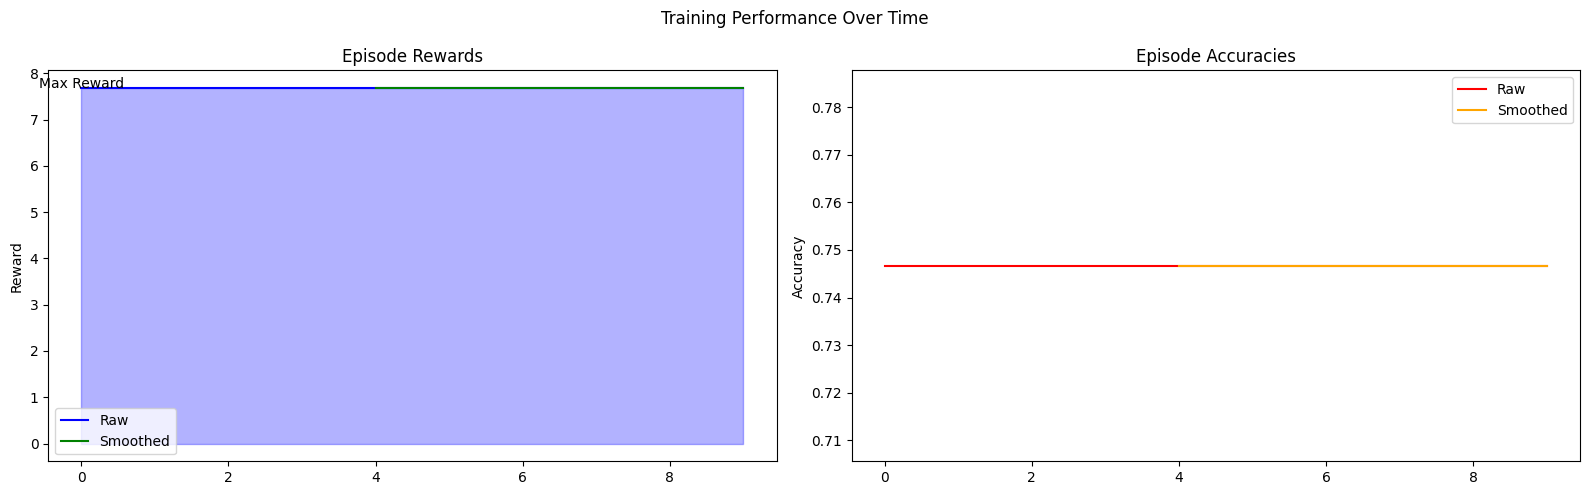

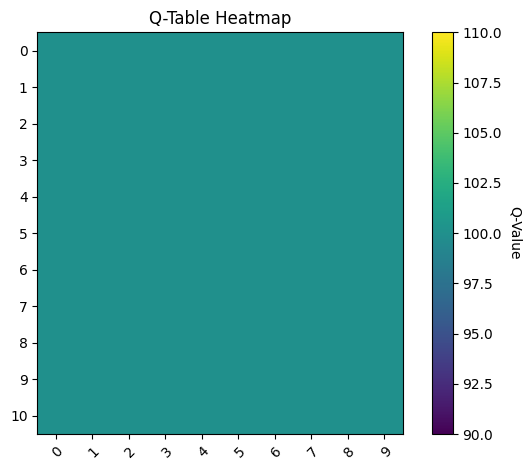

In [16]:
# __________REQUIRED PARAMETERS________
NUM_ACTIONS = len(ALL_METHODS_COMBINATIONS)
NUM_STATES = NUM_ACTIONS + 1
MAX_EPISODES = 10

# __________ENVIRONMENT INITIALIZATION________
ENV = FeatureEngineeringEnvironment(DATA, LABELS, MODEL, FEATURE_METHODS,
                                    ALL_METHODS_COMBINATIONS)

# __________QL-AGENT INITIALIZATION___________
AGENT = QLearningAgent(num_states=NUM_STATES, num_actions=NUM_ACTIONS,
                        lr_min=0.001, lr_max=0.1, df=0.999, eps=1.0, eps_min=0.1,
                        eps_decay=0.001, decay=0.05, window_size=50,
                        total_episodes=MAX_EPISODES)

# __________GET INIIAL MODEL ACCURACY____________
# To set the initial accuracy.
ENV.get_initial_accuracy(DATA, LABELS, MODEL, num_folds=5)
print(f"Initial Accuracy: {ENV.initial_accuracy}")
print("-"*50)

#___________OUTPUTS & VISUALIZATIONS____________________

# Get outputs
OUTPUTS = train_evaluate_agent(ENV, AGENT, ALL_METHODS_COMBINATIONS,
                                MAX_EPISODES)
# Unpack outputs
episode_rewards, episode_accuracies, top_combinations, q_table = OUTPUTS

# Visualize the results of the Q-Learning agent.
VISUALIZE_OUTPUTS = visualize_results(episode_rewards, episode_accuracies,
                                      q_table, NUM_ACTIONS, top_combinations)

#**CALFIORNIA HOUSING DATASET**



*   **Problem Type:** Regression
*   **Model Used:** Linear Regression



In [17]:
# __________CALFIORNIA HOUSING DATASET______________
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
DATA = housing.data
LABELS = housing.target

print(f"Breast Cancer Dataset:\n")
print(f"Data Shape: {DATA.shape}")
print(f"Labels Shape: {LABELS.shape}")
print(f"Data Shape: {DATA.dtype}")
print(f"Labels Shape: {LABELS.dtype}")
print("-"*50)

# __________MODULE CONNECTION_________
selector = MODEL_SELECTOR()
# Select the problem type
problem_type = selector.select_problem_type()
model_options = selector.select_model(problem_type)
print(f"Select a suitable model for {problem_type}: {model_options}")
# User inputs the selected model
SELECTED_MODEL = input("Enter your selected model from the list above: ")

Breast Cancer Dataset:

Data Shape: (20640, 8)
Labels Shape: (20640,)
Data Shape: float64
Labels Shape: float64
--------------------------------------------------
Select a problem type from the following options:
1. Regression
2. Binary_Classification
3. Multiclass_Classification
4. Clustering
5. Recommendation_System
6. Topic_Modeling
7. Image_Classification
8. Text_Classification
Enter your choice (type the name of the problem): Regression
Select a suitable model for Regression: ['linear_rm', 'random_forest_classifier', 'SVM', 'decision_tree_classifier', 'knn_classifier']
Enter your selected model from the list above: linear_rm


In [18]:
GET_MODEL = MODEL_BUILDER(SELECTED_MODEL)
MODEL = GET_MODEL.build_model()
FEATURE_METHODS_DIC = ALGORITHM_METHODS[SELECTED_MODEL]
FEATURE_METHODS = list(FEATURE_METHODS_DIC.keys())
ALL_METHODS_COMBINATIONS = COMBO_GENERATOR(FEATURE_METHODS).generate_combos()
if not ALL_METHODS_COMBINATIONS:
    raise ValueError("No feature method combinations were generated.")

print(f"========================== MODEL & FIEATURES SUMMARY ==========================")
print(f"\nSELECTED MODEL:")
print(f"{MODEL}\n")
print("FEATURE_METHODS:")
for idx, method in enumerate(FEATURE_METHODS, start=1):
    print(f"{idx}. {method}")
print("\nFEATURE_METHODS COMBINATIONS:")
for idx, combo in enumerate(ALL_METHODS_COMBINATIONS, start=1):
    print(f"    {idx}. {combo}")

print("-"*50)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


pca, ica, MinMax
variance_threshold, svd
svd, agglomeration, MinMax
kernel_pca, standard_scaler
ica, nmf, MinMax
kernel_pca, ica, polynomial
pca, agglomeration, MinMax
anova_selector, MinMax
pca, log_transform
variance_threshold, standard_scaler, MinMax
========================== MODEL & FIEATURES SUMMARY ==========================

SELECTED MODEL:
LinearRegression()

FEATURE_METHODS:
1. variance_threshold
2. anova_selector
3. lesso_selector
4. pca
5. kernel_pca
6. ica
7. nmf
8. svd
9. agglomeration
10. standard_scaler
11. MinMax
12. log_transform
13. polynomial

FEATURE_METHODS COMBINATIONS:
    1. ('pca', 'ica', 'MinMax')
    2. ('variance_threshold', 'svd')
    3. ('svd', 'agglomeration', 'MinMax')
    4. ('kernel_pca', 'standard_scaler')
    5. ('ica', 'nmf', 'MinMax')
    6. ('kernel_pca', 'ica', 'polynomial')
    7. ('pca', 'agglomeration', 'MinMax')
    8. ('anova_selector', 'MinMax')
    9. ('pca', 'log_transform')
    10. ('variance_threshold', 'standard_scaler', 'MinMax')
---

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Initial accuracy (cross-validation mean): 0.5530
Initial Accuracy: 0.5530311140279229
--------------------------------------------------
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after fea

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 4:('kernel_pca', 'standard_scaler') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 4:('kernel_pca', 'standard_scaler') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.



Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engine

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape o

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Data processed after applying combination number 1, shape is (20640, 1)
Data processed after applying combination number 2, shape is (20640, 1)
Data processed after applying combination number 3, shape is (20640, 1)
Data processed after applying combination number 4, shape is (20640, 1)
Data processed after applying combination number 5, shape is (20640, 1)
Data processed after applying combination number 6, shape is (20640, 3)
Data processed after applying combination number 7, shape is (20640, 1)
Data processed after applying combination number 8, shape is (20640, 8)
Data processed after applying combination number 9, shape is (20640, 1)
Data processed after applying combination number 10, shape is (20640, 8)
future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kern

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 4:('kernel_pca', 'standard_scaler') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 4:('kernel_pca', 'standard_scaler') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 4:('kernel_pca', 'standard_scaler') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 4:('kernel_pca', 'standard_scaler') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


 (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


(20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 4:('kernel_pca', 'standard_scaler') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 4:('kernel_pca', 'standard_scaler') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 4:('kernel_pca', 'standard_scaler') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Tr

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 4:('kernel_pca', 'standard_scaler') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 4:('kernel_pca', 'standard_scaler') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape o

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape o

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 2:('variance_threshold', 'svd') ==========================
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape o

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature enginee

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 4:('kernel_pca', 'standard_scaler') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


(20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 2:('variance_threshold', 'svd') ==========================
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (206

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 4:('kernel_pca', 'standard_scaler') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 2:('variance_threshold', 'svd') ==========================
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after featur

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 2:('variance_threshold', 'svd') ==========================
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 2:('variance_threshold', 'svd') ==========================
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after featur

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 2:('variance_threshold', 'svd') ==========================
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)


ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 4:('kernel_pca', 'standard_scaler') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Tr

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape o

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 4:('kernel_pca', 'standard_scaler') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.



Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature eng

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 2:('variance_threshold', 'svd') ==========================
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)


ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 2:('variance_threshold', 'svd') ==========================
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after featur

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape o

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 4:('kernel_pca', 'standard_scaler') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 4:('kernel_pca', 'standard_scaler') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 2:('variance_threshold', 'svd') ==========================
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after featur

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 2:('variance_threshold', 'svd') ==========================
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: variance_threshold
Shape of the data now is:  (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after featur

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: 

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


(20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: svd
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
========================== Random combination 3:('svd', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feat

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (20640, 8)
Random combinations (10) :  [('pca', 'ica', 'MinMax'), ('variance_threshold', 'svd'), ('svd', 'agglomeration', 'MinMax'), ('kernel_pca', 'standard_scaler'), ('ica', 'nmf', 'MinMax'), ('kernel_pca', 'ica', 'polynomial'), ('pca', 'agglomeration', 'MinMax'), ('anova_selector', 'MinMax'), ('pca', 'log_transform'), ('variance_threshold', 'standard_scaler', 'MinMax')]
========================== Random combination 1:('pca', 'ica', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape o

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(20640, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: ica
Shape of the data now is:  (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Shape after feature engineering - Train: (20640, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (20640, 3)
========================== Random combination 7:('pca', 'agglomeration', 'MinMax') ==========================
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Shape after feature engineering - Train: (20640, 8)
Applying feature engineering for method: pca
Shape of t

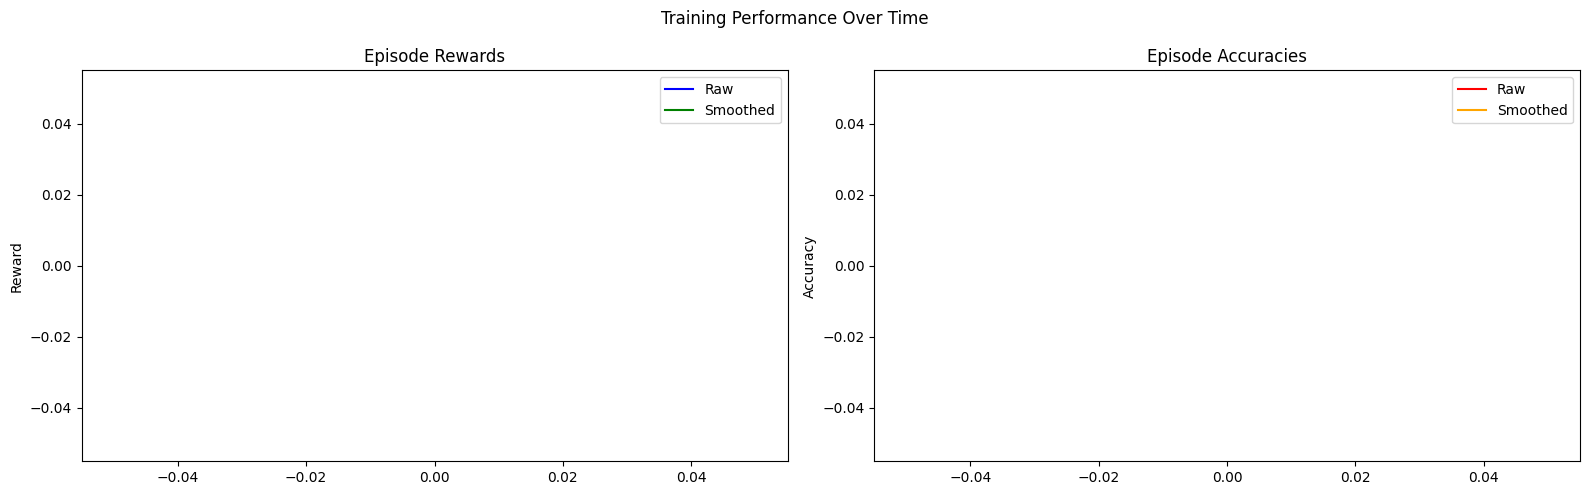

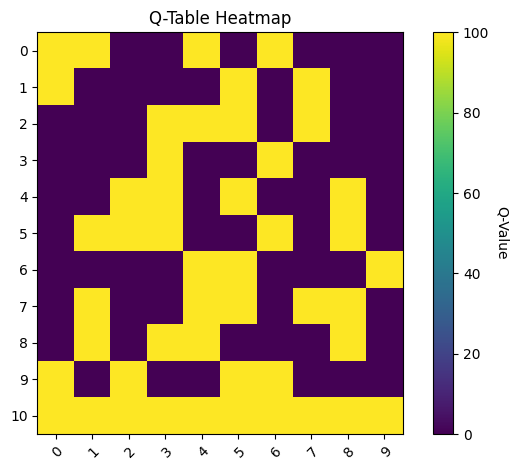

In [19]:
# __________REQUIRED PARAMETERS________
NUM_ACTIONS = len(ALL_METHODS_COMBINATIONS)
NUM_STATES = NUM_ACTIONS + 1
MAX_EPISODES = 10

# __________ENVIRONMENT INITIALIZATION________
ENV = FeatureEngineeringEnvironment(DATA, LABELS, MODEL, FEATURE_METHODS,
                                    ALL_METHODS_COMBINATIONS)

# __________QL-AGENT INITIALIZATION___________
AGENT = QLearningAgent(num_states=NUM_STATES, num_actions=NUM_ACTIONS,
                        lr_min=0.001, lr_max=0.1, df=0.999, eps=1.0, eps_min=0.1,
                        eps_decay=0.001, decay=0.05, window_size=50,
                        total_episodes=MAX_EPISODES)

# __________GET INIIAL MODEL ACCURACY____________
# To set the initial accuracy.
ENV.get_initial_accuracy(DATA, LABELS, MODEL, num_folds=5)
print(f"Initial Accuracy: {ENV.initial_accuracy}")
print("-"*50)

#___________OUTPUTS & VISUALIZATIONS____________________

# Get outputs
OUTPUTS = train_evaluate_agent(ENV, AGENT, ALL_METHODS_COMBINATIONS,
                                MAX_EPISODES)
# Unpack outputs
episode_rewards, episode_accuracies, top_combinations, q_table = OUTPUTS

# Visualize the results of the Q-Learning agent.
VISUALIZE_OUTPUTS = visualize_results(episode_rewards, episode_accuracies,
                                      q_table, NUM_ACTIONS, top_combinations)

#**DIABETES DATASET**


*   **Problem Type:** Regression
*   **Model Used:** Linear Regression



In [ ]:
# ______________________DIABETES DATASET________________________________________
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the dataset
diabetes_dataset = load_diabetes()
data = pd.DataFrame(diabetes_dataset.data, columns=diabetes_dataset.feature_names)
data['progression'] = diabetes_dataset.target

DATA = data.drop('progression', axis=1)
LABELS = data['progression']

print(f"Train Data Shape: {DATA.shape}")
print(f"Train Label Shape: {LABELS.shape}")
print(f"Test Data Shape: {DATA.shape}")
print(f"Test Label Shape: {LABELS.shape}")
print("-"*50)

# __________MODULE CONNECTION_________
selector = MODEL_SELECTOR()
# Select the problem type
problem_type = selector.select_problem_type()
model_options = selector.select_model(problem_type)
print(f"Select a suitable model for {problem_type}: {model_options}")
# User inputs the selected model
SELECTED_MODEL = input("Enter your selected model from the list above: ")

Train Data Shape: (442, 10)
Train Label Shape: (442,)
Test Data Shape: (442, 10)
Test Label Shape: (442,)
--------------------------------------------------
Select a problem type from the following options:
1. Regression
2. Binary_Classification
3. Multiclass_Classification
4. Clustering
5. Recommendation_System
6. Topic_Modeling
7. Image_Classification
8. Text_Classification
Enter your choice (type the name of the problem): Regression
Select a suitable model for Regression: ['linear_rm', 'random_forest_classifier', 'SVM', 'decision_tree_classifier', 'knn_classifier']
Enter your selected model from the list above: linear_rm


In [ ]:
GET_MODEL = MODEL_BUILDER(SELECTED_MODEL)
MODEL = GET_MODEL.build_model()
FEATURE_METHODS_DIC = ALGORITHM_METHODS[SELECTED_MODEL]
FEATURE_METHODS = list(FEATURE_METHODS_DIC.keys())
ALL_METHODS_COMBINATIONS = COMBO_GENERATOR(FEATURE_METHODS).generate_combos()
if not ALL_METHODS_COMBINATIONS:
    raise ValueError("No feature method combinations were generated.")

print(f"========================== MODEL & FIEATURES SUMMARY ==========================")
print(f"\nSELECTED MODEL:")
print(f"{MODEL}\n")
print("FEATURE_METHODS:")
for idx, method in enumerate(FEATURE_METHODS, start=1):
    print(f"{idx}. {method}")
print("\nFEATURE_METHODS COMBINATIONS:")
for idx, combo in enumerate(ALL_METHODS_COMBINATIONS, start=1):
    print(f"    {idx}. {combo}")

print("-"*50)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


lesso_selector, ica, polynomial
anova_selector, lesso_selector, polynomial
anova_selector, nmf, svd
log_transform, polynomial
agglomeration, log_transform
anova_selector, MinMax, log_transform
kernel_pca, standard_scaler, MinMax
pca, agglomeration, log_transform
kernel_pca, nmf
anova_selector, pca, kernel_pca
========================== MODEL & FIEATURES SUMMARY ==========================

SELECTED MODEL:
LinearRegression()

FEATURE_METHODS:
1. variance_threshold
2. anova_selector
3. lesso_selector
4. pca
5. kernel_pca
6. ica
7. nmf
8. svd
9. agglomeration
10. standard_scaler
11. MinMax
12. log_transform
13. polynomial

FEATURE_METHODS COMBINATIONS:
    1. ('lesso_selector', 'ica', 'polynomial')
    2. ('anova_selector', 'lesso_selector', 'polynomial')
    3. ('anova_selector', 'nmf', 'svd')
    4. ('log_transform', 'polynomial')
    5. ('agglomeration', 'log_transform')
    6. ('anova_selector', 'MinMax', 'log_transform')
    7. ('kernel_pca', 'standard_scaler', 'MinMax')
    8. ('pca'

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No

Initial accuracy (cross-validation mean): 0.4823
Initial Accuracy: 0.48231643590864215
--------------------------------------------------
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engi

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 6

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying f

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 4:('log_transform', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Sh

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying f

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: ica
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: polynomial
Shape of the data now is:  (442, 3)
========================== Random combination 2:('anova_selector', 'lesso_selector', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (44

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applyin

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying f

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


========================== Random combination 5:('agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: agglomeration
Shape of the data now is:  (442, 2)
Shape after feature engineering - Train: (442, 2)
Shape after feature engineering - Train: (442, 2)
Shape after feature engineering - Train: (442, 2)
Applying feature engineering for method: log_transform
Shape of the data now is:  (442, 2)
Shape after feature engineering - Train: (442, 2)
========================== Random combination 6:(

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying f

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 4:('log_transform', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Sh

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying f

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying f

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying f

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 4:('log_transform', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering fo

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 4:('log_transform', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Sh

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 9:('kernel_pca', 'nmf') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Trai

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying f

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 4:('log_transform', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Sh

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 4:('log_transform', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Sh

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 4:('log_transform', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering fo

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (442, 10)
Shape after feature engineering - Train: (442, 10)
========================== Random combination 7:('kernel_pca', 'standard_scaler', 'MinMax') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of 

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: polynomial
Shape of the data now is:  (442, 66)
========================== Random combination 5:('agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: agglomeration
Shape of the data now is:  (442, 2)
Shape after feature engineering - Train: (442, 2)
Shape after feature engineering - Train: (442, 2)
Shape after feature engineering - Train: (442, 2)
Applying feat

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 4:('log_transform', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Sh

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying fea

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.


Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of t

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 2)
Shape after feature engineering - Train: (442, 2)
Shape after feature engineering - Train: (442, 2)
Shape after feature engineering - Train: (442, 2)
Applying feature engineering for method: log_transform
Shape of the data now is:  (442, 2)
Shape after feature engineering - Train: (442, 2)
========================== Random combination 6:('anova_selector', 'MinMax', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Tra

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying f

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 10)
Shape after feature engineering - Train: (442, 10)
========================== Random combination 7:('kernel_pca', 'standard_scaler', 'MinMax') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of 

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying f

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 i

(442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442,

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 4:('log_transform', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Sh

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'



Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature 

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: polynomial
Shape of the data now is:  (442, 66)
========================== Random combination 3:('anova_selector', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering -

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying fea

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: log_transform
Shape of the data now is:  (442, 10)
Shape after feature engineering - Train: (442, 10)
========================== Random combination 7:('kernel_pca', 'standard_scaler', 'MinMax') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: 

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No

future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying f

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Dat

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 2)
Shape after feature engineering - Train: (442, 2)
Shape after feature engineering - Train: (442, 2)
Shape after feature engineering - Train: (442, 2)
Applying feature engineering for method: log_transform
Shape of the data now is:  (442, 2)
Shape after feature engineering - Train: (442, 2)
========================== Random combination 6:('anova_selector', 'MinMax', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Tra

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: polynomial
Shape of the data now is:  (442, 66)
========================== Random combination 3:('anova_selector', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineer

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 66)
========================== Random combination 3:('anova_selector', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
================

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 9:('kernel_pca', 'nmf') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Trai

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 4:('log_transform', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Sh

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying fea

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


 (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: log_transform
Shape of the data now is:  (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: polynomial
Shape of the data now is:  (442, 66)
========================== Random combination 5:('agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - T

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: polynomial
Shape of the data now is:  (442, 66)
========================== Random combination 3:('anova_selector', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineer

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 2)
Shape after feature engineering - Train: (442, 2)
Shape after feature engineering - Train: (442, 2)
Shape after feature engineering - Train: (442, 2)
Applying feature engineering for method: log_transform
Shape of the data now is:  (442, 2)
Shape after feature engineering - Train: (442, 2)
========================== Random combination 6:('anova_selector', 'MinMax', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Tra

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


(442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
Data processed after applying combination number 9, shape is (442, 1)
Data processed after applying combination number 10, shape is (442, 1)
future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'i

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (442, 66)
========================== Random combination 3:('anova_selector', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
================

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2,

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying fea

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: polynomial
Shape of the data now is:  (442, 66)
========================== Random combination 3:('anova_selector', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineer

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 4:('log_transform', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering fo

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying f

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 9:('kernel_pca', 'nmf') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Trai

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 9:('kernel_pca', 'nmf') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No

future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying f

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 4:('log_transform', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape af

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: polynomial
Shape of the data now is:  (442, 66)
========================== Random combination 3:('anova_selector', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering -

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying f

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 4:('log_transform', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Sh

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 4:('log_transform', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Sh

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying fea

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: log_transform
Shape of the data now is:  (442, 10)
Shape after feature engineering - Train: (442, 10)
========================== Random combination 7:('kernel_pca', 'standard_scaler', 'MinMax') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: 

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 4:('log_transform', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Sh

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


 (442, 66)
========================== Random combination 3:('anova_selector', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combinat

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 9:('kernel_pca', 'nmf') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Trai

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 9:('kernel_pca', 'nmf') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Trai

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


 (442, 1)
Applying feature engineering for method: agglomeration
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: log_transform
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 9:('kernel_pca', 'nmf') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature eng

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying fea

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying fea

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (442, 3)
========================== Random combination 2:('anova_selector', 'lesso_selector', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: polynomial
Shape of th

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: polynomial
Shape of the data now is:  (442, 66)
========================== Random combination 3:('anova_selector', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering -

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying fea

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: polynomial
Shape of the data now is:  (442, 66)
========================== Random combination 5:('agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: agglomeration
Shape of the data now is:  (442, 2)
Shape after feature engineering - Train: (442, 2)
Shape after feature engineering - Train: (442, 2)
Shape after feature engineering - Train: (442, 2)
Applying feat

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


 (442, 3)
========================== Random combination 2:('anova_selector', 'lesso_selector', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: polynomial
Shape of the data now is:  (442, 66)


ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 4:('log_transform', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering fo

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying fea

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 2)
Shape after feature engineering - Train: (442, 2)
Shape after feature engineering - Train: (442, 2)
Shape after feature engineering - Train: (442, 2)
Applying feature engineering for method: log_transform
Shape of the data now is:  (442, 2)
Shape after feature engineering - Train: (442, 2)
========================== Random combination 6:('anova_selector', 'MinMax', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Tra

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying f

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: svd
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 4:('log_transform', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Sh

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (442, 2)
Shape after feature engineering - Train: (442, 2)
========================== Random combination 6:('anova_selector', 'MinMax', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method:

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No


Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: ica
Shape of the data now is:  (442, 1)
Shape after featu

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: log_transform
Shape of the data now is:  (442, 10)
Shape after feature engineering - Train: (442, 10)
========================== Random combination 7:('kernel_pca', 'standard_scaler', 'MinMax') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: 

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 100, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying f

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: log_transform
Shape of the data now is:  (442, 10)
Shape after feature engineering - Train: (442, 10)
========================== Random combination 7:('kernel_pca', 'standard_scaler', 'MinMax') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: 

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 66)
Data processed after applying combination number 5, shape is (442, 2)
Data processed after applying combination number 6, shape is (442, 10)
Data processed after applying combination number 7, shape is (442, 1)
Data processed after applying combination number 8, shape is (442, 1)
D

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: log_transform
Shape of the data now is:  (442, 10)
Shape after feature engineering - Train: (442, 10)
========================== Random combination 7:('kernel_pca', 'standard_scaler', 'MinMax') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: 

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying fea

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: polynomial
Shape of the data now is:  (442, 66)
========================== Random combination 3:('anova_selector', 'nmf', 'svd') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering -

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: nmf
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engine

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 4:('log_transform', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering fo

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Data processed after applying combination number 1, shape is (442, 3)
Data processed after applying combination number 2, shape is (442, 66)
Data processed after applying combination number 3, shape is (442, 1)
Data processed after applying combination number 4, shape is (442, 6

ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: standard_scaler
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: MinMax
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 8:('pca', 'agglomeration', 'log_transform') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now

ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method lesso_selector failed: DATA_ENGINEERING.engineer_data() got multiple values for argument 'transform_only'
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method svd failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by TruncatedSVD.
ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector
ERROR:FeatureEngineeringEnvironment:Method agglomeration failed: Found array with 1 feature(s) (shape=(442, 1)) while a minimum of 2 is required by FeatureAgglomeration.


future_reward: 100, old_q_value: 0, reward: nan
shape of the input data is:  (442, 10)
Random combinations (10) :  [('lesso_selector', 'ica', 'polynomial'), ('anova_selector', 'lesso_selector', 'polynomial'), ('anova_selector', 'nmf', 'svd'), ('log_transform', 'polynomial'), ('agglomeration', 'log_transform'), ('anova_selector', 'MinMax', 'log_transform'), ('kernel_pca', 'standard_scaler', 'MinMax'), ('pca', 'agglomeration', 'log_transform'), ('kernel_pca', 'nmf'), ('anova_selector', 'pca', 'kernel_pca')]
========================== Random combination 1:('lesso_selector', 'ica', 'polynomial') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: lesso_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying fea

ERROR:FeatureEngineeringEnvironment:Method anova_selector failed: No method defined for: anova_selector


Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature engineering - Train: (442, 1)
========================== Random combination 10:('anova_selector', 'pca', 'kernel_pca') ==========================
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: anova_selector
Shape after feature engineering - Train: (442, 10)
Shape after feature engineering - Train: (442, 10)
Applying feature engineering for method: pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Applying feature engineering for method: kernel_pca
Shape of the data now is:  (442, 1)
Shape after feature engineering - Train: (442, 1)
Shape after feature

Learned Q-Table:
      0    1    2    3    4    5    6    7    8    9
0     0  100    0  100    0  100    0    0    0    0
1     0  100  100  100  100  100    0    0    0    0
2     0    0  100    0    0  100  100    0    0  100
3     0  100    0  100  100    0    0  100  100    0
4   100  100  100    0  100    0    0    0    0  100
5     0  100  100  100    0    0    0  100    0    0
6     0  100    0    0    0    0    0    0    0  100
7     0  100    0  100    0    0  100  100    0  100
8     0    0    0    0    0    0    0  100    0  100
9     0    0  100    0    0    0    0  100    0    0
10  100  100  100  100  100  100  100  100  100  100


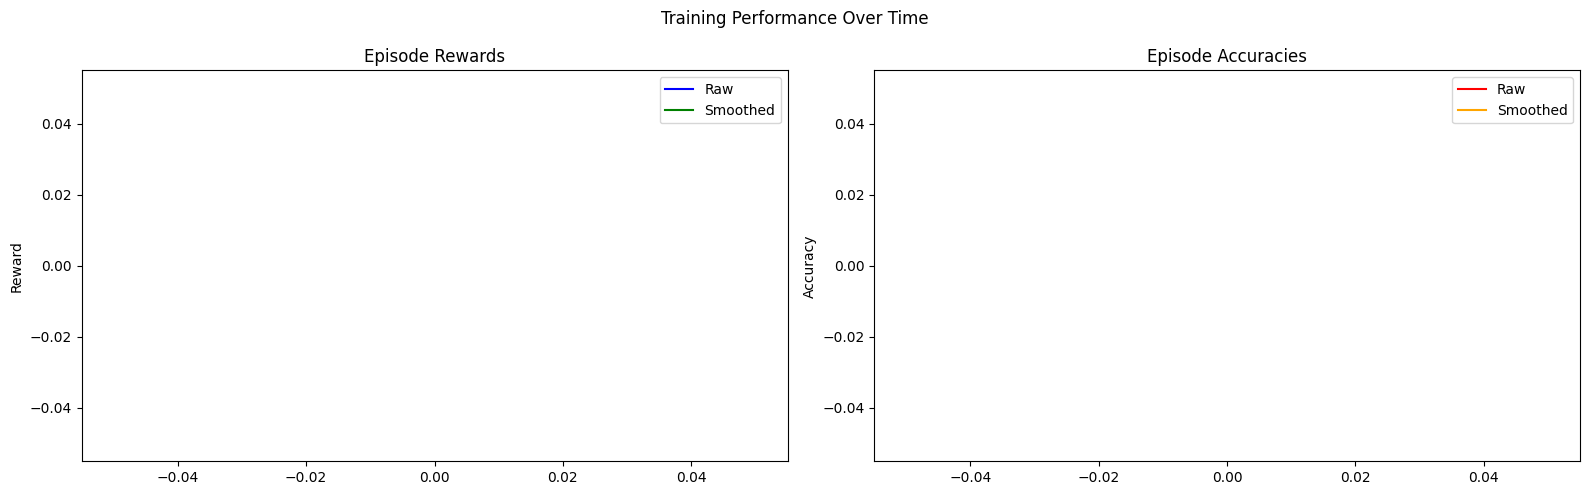

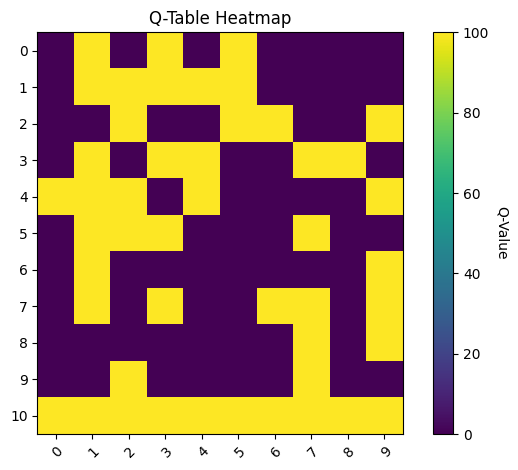

In [ ]:
# __________REQUIRED PARAMETERS________
NUM_ACTIONS = len(ALL_METHODS_COMBINATIONS)
NUM_STATES = NUM_ACTIONS + 1
MAX_EPISODES = 10

# __________ENVIRONMENT INITIALIZATION________
ENV = FeatureEngineeringEnvironment(DATA, LABELS, MODEL, FEATURE_METHODS,
                                    ALL_METHODS_COMBINATIONS)

# __________QL-AGENT INITIALIZATION___________
AGENT = QLearningAgent(num_states=NUM_STATES, num_actions=NUM_ACTIONS,
                        lr_min=0.001, lr_max=0.1, df=0.999, eps=1.0, eps_min=0.1,
                        eps_decay=0.001, decay=0.05, window_size=50,
                        total_episodes=MAX_EPISODES)

# __________GET INIIAL MODEL ACCURACY____________
# To set the initial accuracy.
ENV.get_initial_accuracy(DATA, LABELS, MODEL, num_folds=5)
print(f"Initial Accuracy: {ENV.initial_accuracy}")
print("-"*50)

#___________OUTPUTS & VISUALIZATIONS____________________

# Get outputs
OUTPUTS = train_evaluate_agent(ENV, AGENT, ALL_METHODS_COMBINATIONS,
                                MAX_EPISODES)
# Unpack outputs
episode_rewards, episode_accuracies, top_combinations, q_table = OUTPUTS

# Visualize the results of the Q-Learning agent.
VISUALIZE_OUTPUTS = visualize_results(episode_rewards, episode_accuracies,
                                      q_table, NUM_ACTIONS, top_combinations)

#**CIFAR10 DATASET**



*   **Problem Type:** Image Classification
*   **Model Used:** Convolution Neural Network (CNN)



In [ ]:
# ______________________CIFAR10 DATASET_________________________________________

from keras.datasets import cifar10
# Load CIFAR-10 dataset
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()
# Get the total lengths
num_train = len(train_data)
num_test = len(test_data)
# Define subset sizes
num_train_samples = min(10000, num_train)
num_test_samples = min(2000, num_test)
# Take subsets from both data and labels
train_data_subset = train_data[:num_train_samples]
train_labels_subset = train_labels[:num_train_samples]
test_data_subset = test_data[:num_test_samples]
test_labels_subset = test_labels[:num_test_samples]
# Flatten the image data
train_data_flattened = train_data_subset.reshape((train_data_subset.shape[0], -1))
test_data_flattened = test_data_subset.reshape((test_data_subset.shape[0], -1))
train_labels_flattened = train_labels_subset.flatten()
test_labels_flattened = test_labels_subset.flatten()

DATA = train_data_flattened
LABELS = train_labels_flattened

print(f"Train Data Shape: {DATA.shape}")
print(f"Train Label Shape: {LABELS.shape}")
print(f"Test Data Shape: {DATA.shape}")
print(f"Test Label Shape: {LABELS.shape}")
print("-"*50)

# __________MODULE CONNECTION_________
selector = MODEL_SELECTOR()
# Select the problem type
problem_type = selector.select_problem_type()
model_options = selector.select_model(problem_type)
print(f"Select a suitable model for {problem_type}: {model_options}")
# User inputs the selected model
SELECTED_MODEL = input("Enter your selected model from the list above: ")

In [ ]:
GET_MODEL = MODEL_BUILDER(SELECTED_MODEL)
MODEL = GET_MODEL.build_model()
FEATURE_METHODS_DIC = ALGORITHM_METHODS[SELECTED_MODEL]
FEATURE_METHODS = list(FEATURE_METHODS_DIC.keys())
ALL_METHODS_COMBINATIONS = COMBO_GENERATOR(FEATURE_METHODS).generate_combos()
if not ALL_METHODS_COMBINATIONS:
    raise ValueError("No feature method combinations were generated.")

print(f"========================== MODEL & FIEATURES SUMMARY ==========================")
print(f"\nSELECTED MODEL:")
print(f"{MODEL}\n")
print("FEATURE_METHODS:")
for idx, method in enumerate(FEATURE_METHODS, start=1):
    print(f"{idx}. {method}")
print("\nFEATURE_METHODS COMBINATIONS:")
for idx, combo in enumerate(ALL_METHODS_COMBINATIONS, start=1):
    print(f"    {idx}. {combo}")

print("-"*50)


In [ ]:
# __________REQUIRED PARAMETERS________
NUM_ACTIONS = len(ALL_METHODS_COMBINATIONS)
NUM_STATES = NUM_ACTIONS + 1
MAX_EPISODES = 10

# __________ENVIRONMENT INITIALIZATION________
ENV = FeatureEngineeringEnvironment(DATA, LABELS, MODEL, FEATURE_METHODS,
                                    ALL_METHODS_COMBINATIONS)

# __________QL-AGENT INITIALIZATION___________
AGENT = QLearningAgent(num_states=NUM_STATES, num_actions=NUM_ACTIONS,
                        lr_min=0.001, lr_max=0.1, df=0.999, eps=1.0, eps_min=0.1,
                        eps_decay=0.001, decay=0.05, window_size=50,
                        total_episodes=MAX_EPISODES)

# __________GET INIIAL MODEL ACCURACY____________
# To set the initial accuracy.
ENV.get_initial_accuracy(DATA, LABELS, MODEL, num_folds=5)
print(f"Initial Accuracy: {ENV.initial_accuracy}")
print("-"*50)

#___________OUTPUTS & VISUALIZATIONS____________________

# Get outputs
OUTPUTS = train_evaluate_agent(ENV, AGENT, ALL_METHODS_COMBINATIONS,
                                MAX_EPISODES)
# Unpack outputs
episode_rewards, episode_accuracies, top_combinations, q_table = OUTPUTS

# Visualize the results of the Q-Learning agent.
VISUALIZE_OUTPUTS = visualize_results(episode_rewards, episode_accuracies,
                                      q_table, NUM_ACTIONS, top_combinations)